<a href="https://colab.research.google.com/github/tolgaenginn/Binary-Search/blob/main/ergasia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from itertools import product

#QUESTION 1

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


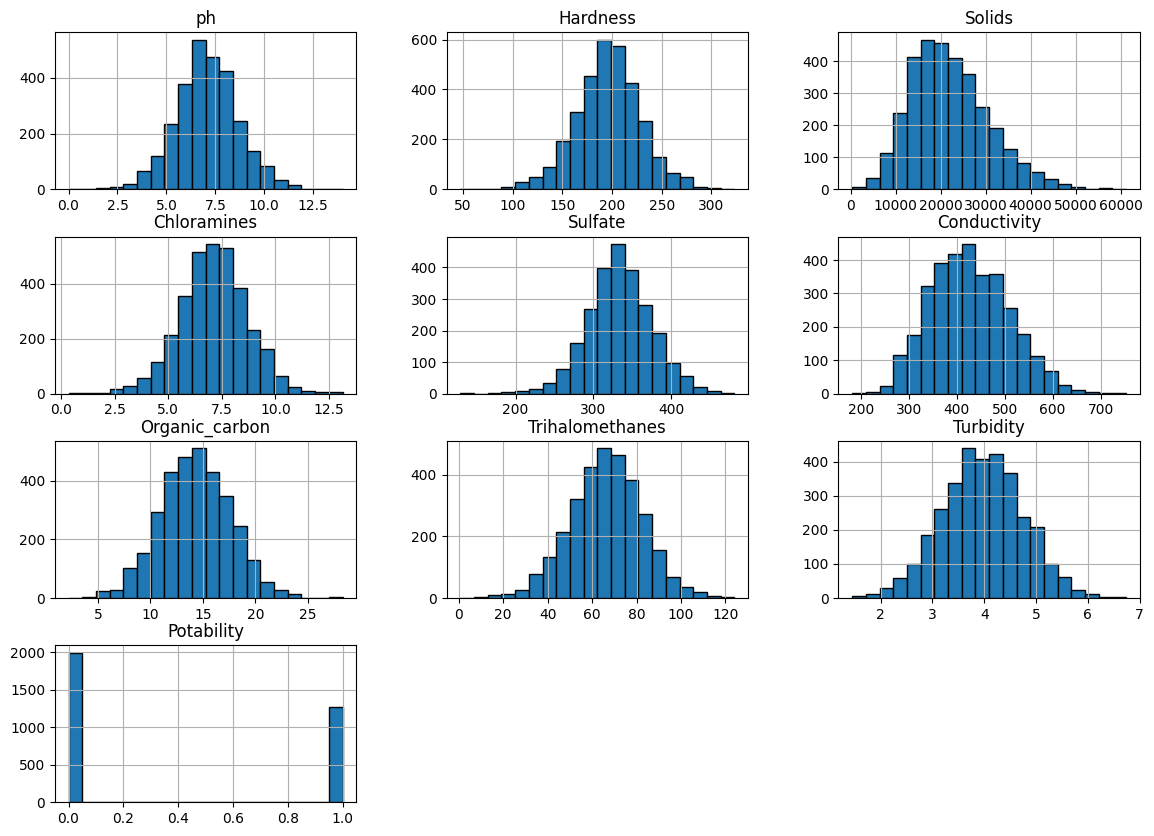

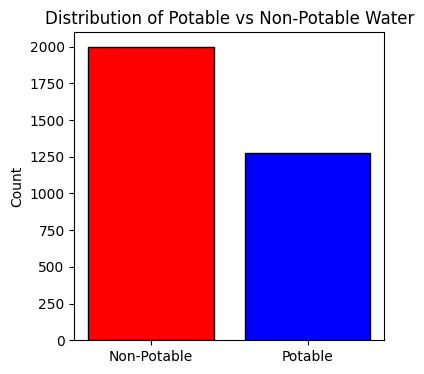


Missing values per column:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
            count  Percentage (%)
Potability                       
0            1998       60.989011
1            1278       39.010989


In [ ]:
#Load the data into a DataFrame.
df = pd.read_csv("water_potability.csv")

#describe them
display(df.describe())

#create a histogram for each feature
df.hist(figsize=(14, 10), bins=20, edgecolor='black')
plt.show()

#creat bar chart for Potability.
counts = df['Potability'].value_counts().sort_index()
plt.figure(figsize=(4,4))
plt.bar(counts.index, counts.values, color=['red', 'blue'], edgecolor='black')
plt.title("Distribution of Potable vs Non-Potable Water")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Potable', 'Potable'])
plt.show()

#missing values for each feature
print("\nMissing values per column:")
print(df.isnull().sum())

#percentages of potable and non-potable water in the examples
potability_counts = df['Potability'].value_counts()
percentages = potability_counts / len(df) * 100
print(pd.concat([potability_counts, percentages.rename('Percentage (%)')], axis=1))





#   Do you consider the data quality satisfactory? Answer.
Data has certain missing values especially for sulfate, ph. Other than that most of the feature distributions resemble normal distribution (even though there are skewed distributions in data)which makes the whole process of training a model less complicated



#QUESTION 2





In [ ]:
#According to the World Health Organization (WHO), the recommended pH levels for water are between 6.5 and 8.5.
# Compute the percentages of potable and non-potable water in the examples for a), b), and c).
# To what extent is this property verified in your data?

#for missing values
df_ph = df.dropna(subset=['ph'])

low_ph = df_ph[df_ph['ph'] < 6.5]
mid_ph = df_ph[(df_ph['ph'] >= 6.5) & (df_ph['ph'] <= 8.5)]
high_ph = df_ph[df_ph['ph'] > 8.5]

# Helper function
def potable_ratio(subset):
    total = len(subset)
    potable = subset['Potability'].sum()
    non_potable = total - potable
    return {
        "Total": total,
        "Potable Percentage": round(potable / total * 100, 2) if total > 0 else 0,
        "NonPotable Percentage": round(non_potable / total * 100, 2) if total > 0 else 0
    }

stats = pd.DataFrame({
    "pH < 6.5": potable_ratio(low_ph),
    "6.5 ≤ pH ≤ 8.5": potable_ratio(mid_ph),
    "pH > 8.5": potable_ratio(high_ph)
}).T

display(stats)


,Total,Potable Percentage,NonPotable Percentage
pH < 6.5,968.0,36.78,63.22
6.5 ≤ pH ≤ 8.5,1328.0,43.90,56.10
pH > 8.5,489.0,33.13,66.87


#QUESTION 3

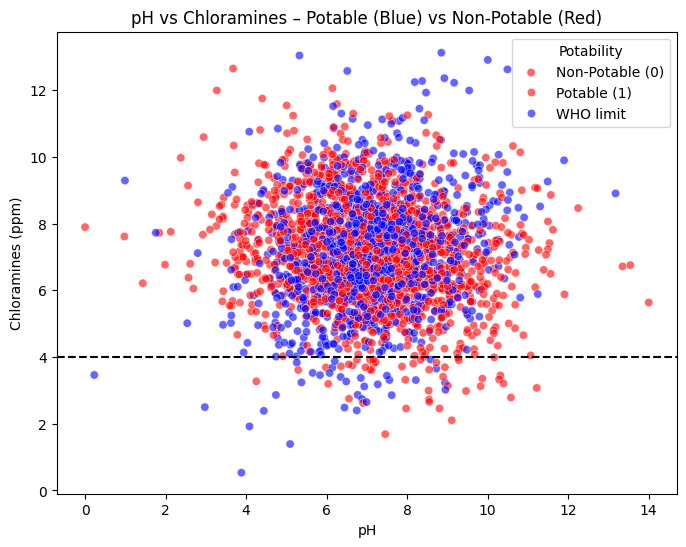

In [ ]:
#According to the WHO, the recommended chloramine levels are up to 4 ppm.
# Create a scatter plot with x: pH and y: Chloramine, coloring potable examples
# in blue and non-potable examples in red.
# What do you observe about the separability of the examples?

df_scatter = df.dropna(subset=['ph', 'Chloramines'])

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_scatter,
    x='ph',
    y='Chloramines',
    hue='Potability',
    palette=['red', 'blue'],
    alpha=0.6
)

plt.axhline(4, color='black', linestyle='--', label='WHO limit (4 ppm)')
plt.title("pH vs Chloramines – Potable (Blue) vs Non-Potable (Red)")
plt.xlabel("pH")
plt.ylabel("Chloramines (ppm)")
plt.legend(title="Potability", labels=['Non-Potable (0)', 'Potable (1)', 'WHO limit'])
plt.show()



There is no clear seperability

#QUESTION 4

In [ ]:
#Fill in the missing values (if any). You can use pandas’ fillna() function.
# For simplicity, you may use a constant (e.g., df['x'] = df['x'].fillna(c)
# where c is 0 or −1 if there are no other such values in the column).
# Alternatively, you can fill with the mean (e.g., df['x'] = df['x'].fillna(df['x'].mean())).
# This step is necessary because you cannot proceed to train the tree
# (scikit-learn does not automatically handle missing values in trees).


# Check missing values firstly
print("Missing values per feature before filling:")
print(df.isnull().sum())

#Fill in the missing values (if any). You can use pandas’ fillna() function.
df_filled = df.fillna(df.mean(numeric_only=True))

# final check
print("\nMissing values per feature after filling:")
print(df_filled.isnull().sum())






Missing values per feature before filling:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing values per feature after filling:
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


#QUESTION 5

In [ ]:
#Create NumPy arrays with appropriate inputs (x) and targets (y),
# where the target is potability.
X = df.drop(columns=['Potability']).values
y = df['Potability'].values

#Split the data into train–test with a 70–30 ratio and seed = 0.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

#QUESTION 6

In [ ]:
#	Train a Decision Tree classifier on the train set
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

# and then measure its accuracy on the train and test sets.
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


Training Accuracy: 0.9987
Test Accuracy: 0.5677


#QUESTION 7

In [ ]:
#ranges
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features = [None, 'sqrt']
ccp_alphas = [0, 0.01]

combinations = list(product(criteria, max_depths, min_samples_splits,
                            min_samples_leafs, max_features, ccp_alphas))

results = []

for criterion, max_depth, min_split, min_leaf, max_feat, alpha in combinations:
    tree = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_split,
        min_samples_leaf=min_leaf,
        max_features=max_feat,
        ccp_alpha=alpha,
        random_state=0
    )

    tree.fit(X_train, y_train)
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "criterion": criterion,
        "max_depth": max_depth,
        "min_samples_split": min_split,
        "min_samples_leaf": min_leaf,
        "max_features": max_feat,
        "ccp_alpha": alpha,
        "train_acc": round(train_acc, 3),
        "test_acc": round(test_acc, 3)
    })

results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="test_acc", ascending=False)
display(results_df.head(10))


,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
92,entropy,5.0,5,2,None,0.0,0.666,0.659
84,entropy,5.0,2,2,None,0.0,0.667,0.658
88,entropy,5.0,5,1,None,0.0,0.667,0.658
80,entropy,5.0,2,1,None,0.0,0.668,0.656
44,gini,5.0,5,2,None,0.0,0.665,0.646
36,gini,5.0,2,2,None,0.0,0.666,0.645
32,gini,5.0,2,1,None,0.0,0.666,0.644
40,gini,5.0,5,1,None,0.0,0.666,0.644
64,entropy,3.0,2,1,None,0.0,0.642,0.638
68,entropy,3.0,2,2,None,0.0,0.642,0.638


#QUESTION 8

Best parameters (max_depth = 3):


,64
criterion,entropy
max_depth,3.0
min_samples_split,2
min_samples_leaf,1
max_features,None
ccp_alpha,0.0
train_acc,0.642
test_acc,0.638


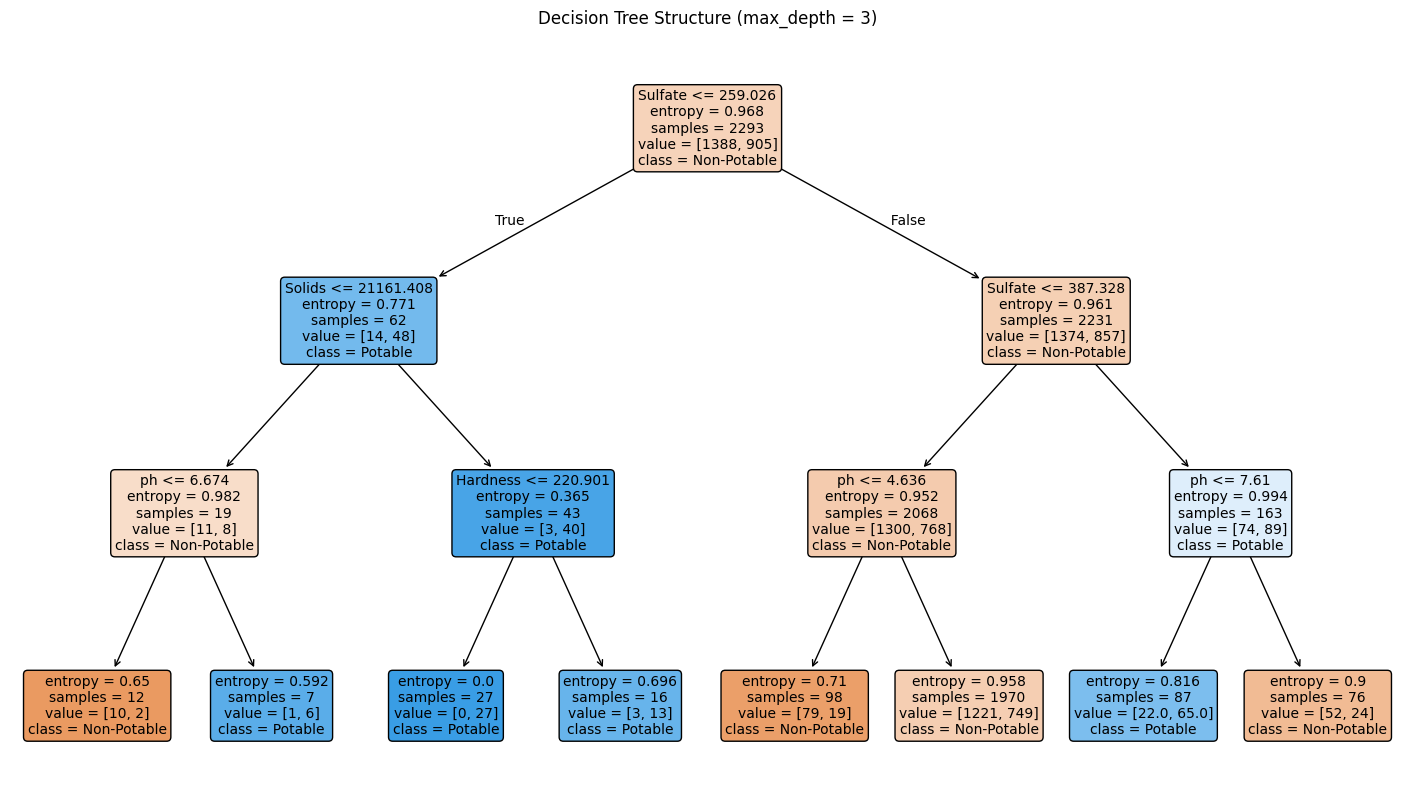

In [ ]:


#Choose the combination with the highest test accuracy when max_depth = 3.
best_params = results_df[(results_df['max_depth'] == 3)].sort_values(
    by='test_acc', ascending=False
).iloc[0]

print("Best parameters (max_depth = 3):")
display(best_params)


#train this tree again
best_tree = DecisionTreeClassifier(
    criterion=str(best_params['criterion']),
    max_depth=int(best_params['max_depth']) if pd.notna(best_params['max_depth']) else None,
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=None if best_params['max_features'] in [None, 'None', 'nan'] else str(best_params['max_features']),
    ccp_alpha=float(best_params['ccp_alpha']),
    random_state=0
)

best_tree.fit(X_train, y_train)

#visualize its structure
plt.figure(figsize=(18, 10))
plot_tree(
    best_tree,
    feature_names=df.drop(columns=['Potability']).columns,
    class_names=['Non-Potable', 'Potable'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure (max_depth = 3)")
plt.show()




#QUESTION 9

Best overall parameters:


,92
criterion,entropy
max_depth,5.0
min_samples_split,5
min_samples_leaf,2
max_features,None
ccp_alpha,0.0
train_acc,0.666
test_acc,0.659


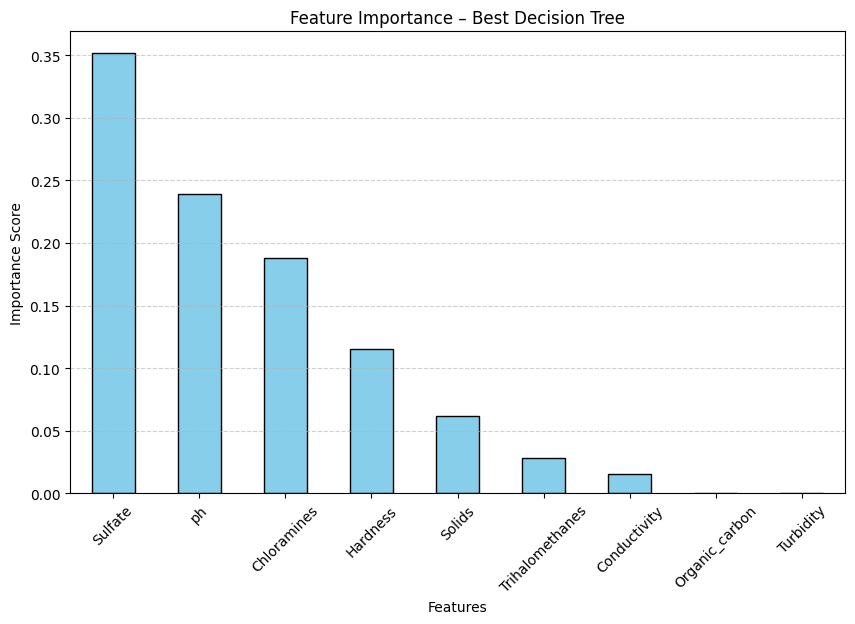

Top 5 most important features for potability prediction:


,0
Sulfate,0.351528
ph,0.239528
Chloramines,0.187742
Hardness,0.115651
Solids,0.061468


In [ ]:
# Select the combination with the highest test accuracy overall.
best_overall = results_df.sort_values(by='test_acc', ascending=False).iloc[0]

print("Best overall parameters:")
display(best_overall)


#Retrain the tree and create a bar chart of feature importance values according to that tree.
final_tree = DecisionTreeClassifier(
    criterion=str(best_overall['criterion']),
    max_depth=int(best_overall['max_depth']) if pd.notna(best_overall['max_depth']) else None,
    min_samples_split=int(best_overall['min_samples_split']),
    min_samples_leaf=int(best_overall['min_samples_leaf']),
    max_features=None if best_overall['max_features'] in [None, 'None', 'nan'] else str(best_overall['max_features']),
    ccp_alpha=float(best_overall['ccp_alpha']),
    random_state=0
)

final_tree.fit(X_train, y_train)

importances = pd.Series(final_tree.feature_importances_, index=df.drop(columns=['Potability']).columns)

importances_sorted = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
importances_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Feature Importance – Best Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# If the device can only support 5 chemical analyses, which 5 features should it measure?
top5 = importances_sorted.head(5)
print("Top 5 most important features for potability prediction:")
display(top5)


from the table the most 5 important features are sulfate ph chloramines hardness and soldis. this means they are the most important factors while deciding potability

#QUESTION 10

same question as question 9

#QUESTION 11

Decision tree overfits the data. Therefore doesnt generalize well. random forest however creates many trees and then takes average. This way it provides better generalization performance and better accuracy

#QUESTION 12

In [ ]:
n_estimators_values = [50, 100, 200]
results = []

for n in n_estimators_values:
    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=0
    )
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    results.append({
        "n_estimators": n,
        "train_acc": round(train_acc, 3),
        "test_acc": round(test_acc, 3)
    })

results_rf_simple = pd.DataFrame(results)
display(results_rf_simple)


,n_estimators,train_acc,test_acc
0,50,1.0,0.670
1,100,1.0,0.677
2,200,1.0,0.684


#QUESTION 13

its more important to predict undrinkable water as it poses health risks. On the other hand predicting a safe water as undrinkable wouldnt result in death of anyone

#QUESTION 14

Random forest is safer as it makes better choices whereas single decision tree might overfit or make extreme decisions.